In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [12]:
# --- Step 1: Data Loading and Inspection ---
print("--- Step 1: Data Loading and Inspection ---")
try:
    file_path = '/content/googleplaystoreAPP.csv'
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print("\nInitial Data Info:")
    df.info()
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please ensure the CSV file is in the same directory as this script.")
    exit()

--- Step 1: Data Loading and Inspection ---
Dataset loaded successfully.

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [13]:
# --- Step 2: Data Preprocessing and Cleaning ---
print("\n--- Step 2: Data Preprocessing and Cleaning ---")

# Drop the problematic row (row 10472 has an issue with the 'Category' and 'Rating' columns)
df = df.drop(10472)

# Clean and convert the 'Installs' column
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x).astype(int)

# Clean and convert the 'Reviews' column to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'])

# Clean and convert the 'Size' column
df['Size'] = df['Size'].astype(str).str.replace('M', 'e6').str.replace('k', 'e3')
df['Size'] = df['Size'].apply(lambda x: np.nan if 'Varies with device' in str(x) else float(x))
df['Size'].fillna(df['Size'].median(), inplace=True)

# Clean and convert the 'Price' column
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)

# Drop rows with any remaining missing values in the key columns
df.dropna(subset=['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Type'], inplace=True)

print("Data cleaning and type conversion complete.")
print("\nCleaned DataFrame Info:")
df.info()



--- Step 2: Data Preprocessing and Cleaning ---
Data cleaning and type conversion complete.

Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


/tmp/ipython-input-1114858914.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Size'].fillna(df['Size'].median(), inplace=True)



--- Step 3: Exploratory Data Analysis (EDA) & Visualization ---


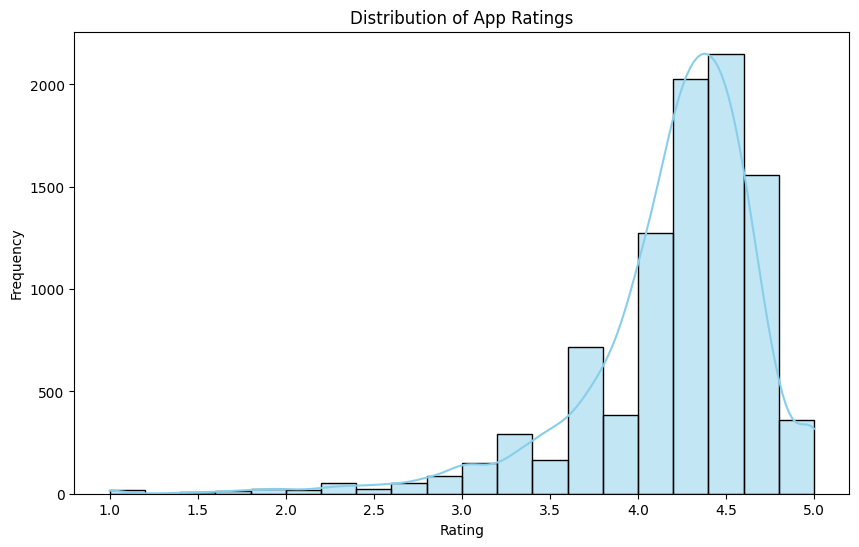

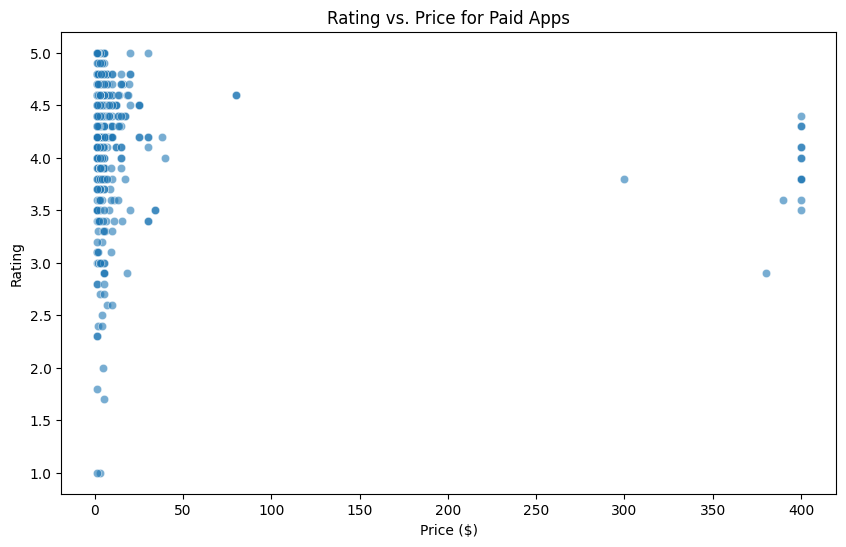

Key insights from EDA have been visualized.


In [14]:
# --- Step 3: Exploratory Data Analysis (EDA) & Visualization ---
print("\n--- Step 3: Exploratory Data Analysis (EDA) & Visualization ---")

# Distribution of App Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Relationship between Price and Rating for Paid Apps
paid_apps = df[df['Type'] == 'Paid']
if not paid_apps.empty:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Price', y='Rating', data=paid_apps, alpha=0.6)
    plt.title('Rating vs. Price for Paid Apps')
    plt.xlabel('Price ($)')
    plt.ylabel('Rating')
    plt.show()

print("Key insights from EDA have been visualized.")

In [15]:
# --- Step 4: Feature Engineering and Model Setup ---
print("\n--- Step 4: Feature Engineering and Model Setup ---")

# Use LabelEncoder to encode categorical features for modeling
le_category = LabelEncoder()
le_type = LabelEncoder()

df['Category_encoded'] = le_category.fit_transform(df['Category'])
df['Type_encoded'] = le_type.fit_transform(df['Type'])

# Define features (X) and target (y)
features = ['Reviews', 'Size', 'Installs', 'Price', 'Category_encoded', 'Type_encoded']
target = 'Rating'
X = df[features]
y = df[target]

print("Features engineered and data is ready for modeling.")


--- Step 4: Feature Engineering and Model Setup ---
Features engineered and data is ready for modeling.


In [16]:
# --- Step 5: Modeling: Build a Regression Model ---
print("\n--- Step 5: Modeling ---")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

# Make predictions on the test set
y_pred = model.predict(X_test)
print("Predictions made on the test set.")

# --- Step 6: Evaluation ---
print("\n--- Step 6: Evaluation ---")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")


--- Step 5: Modeling ---
Linear Regression model trained successfully.
Predictions made on the test set.

--- Step 6: Evaluation ---
Mean Squared Error (MSE): 0.2453
R-squared (R2) Score: 0.0049



--- Step 7: Visualization of Model Results ---


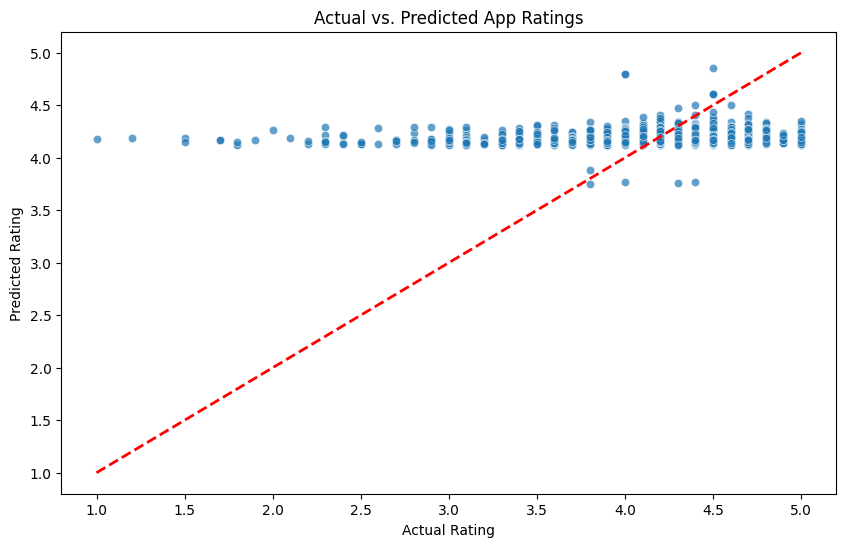


Full project workflow completed successfully.


In [17]:
# --- Step 7: Visualization: Visualize model results ---
print("\n--- Step 7: Visualization of Model Results ---")

# Visualize Actual vs. Predicted Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.title('Actual vs. Predicted App Ratings')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.show()

print("\nFull project workflow completed successfully.")